# Principal Component Analysis (PCA)

The objective of PCA is to reduce the number of Dimensions/Features in a dataset.  This new dataset with fewer dimensions will help reduce the computation and complexity of the model we build.

For this example, we will use the Orthopeadic dataset which has 6 Features and 1 dependent class.


*   First we will perform PCA on the data to reduce its Dimensions
*   Next, using the dataset with fewer Dimensions, we will build a KNN Classification model.
*   Finally, we will compare the performance of the KNN Classification Model using the original dataset which was 0.822 versus the KNN Classification Model using the dataset after PCA.



In [1]:
# prompt: load packages required for performing PCA and KNN models

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt



In [2]:
# prompt: Read data column_3C_weka.csv and display top 5 rows

# Load the dataset
data = pd.read_csv('column_3C_weka.csv')
# Display the top 5 rows
print(data.head())

   pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027817    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis   class  
0      98.672917                 -0.254400  Hernia  
1     114.405425                  4.564259  Hernia  
2     105.985135                 -3.530317  Hernia  
3     101.868495                 11.211523  Hernia  
4     108.168725                  7.918501  Hernia  


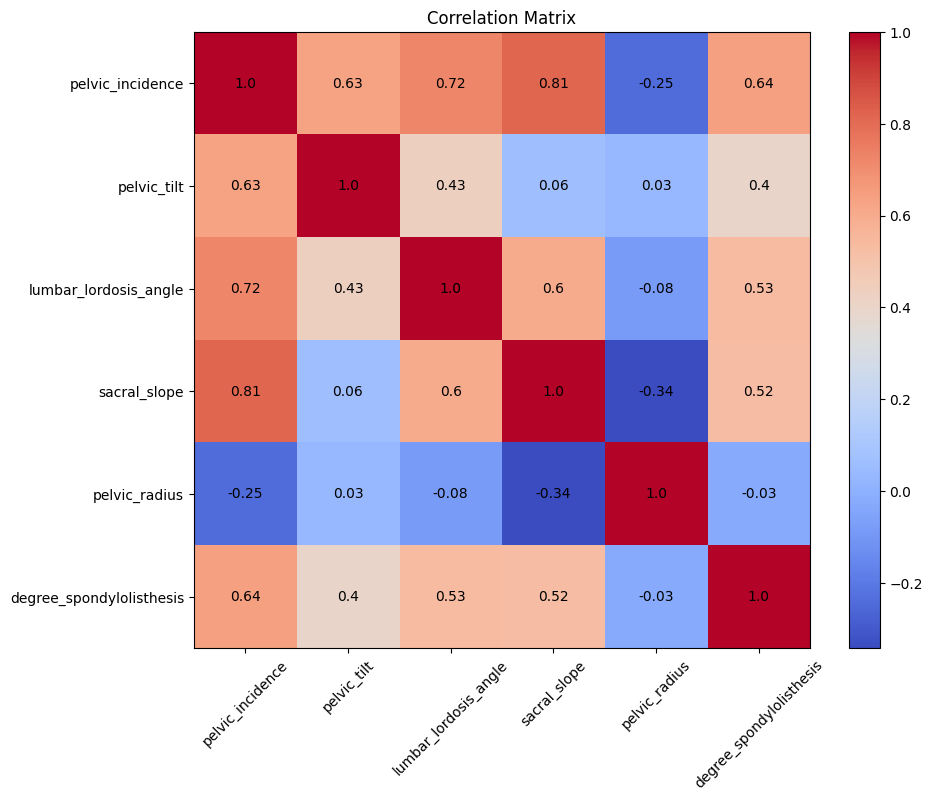

In [6]:
# prompt: Create correlation matrix between all variables except class and visualize

# Assuming 'class' is the column name for the class variable
# Create correlation matrix
correlation_matrix = data.drop('class', axis=1).corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')

# Add correlation values to the plot
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = plt.text(j, i, round(correlation_matrix.iloc[i, j], 2),
                       ha="center", va="center", color="black")

plt.show()

**Observations:**  
High Correlation can be found between pelvic_incidence and sacral_slope, pelvic_incidence and lumbar_lordosis_angle.

Moderate Correlation can be found between pelvic_incidence and degree_spondylolisthesis, pelvic_incidence and pelvic_tilt

***We can expect PCA to consolidate information from these highly correlated variables in an effort to reduce the number of dimensions.***

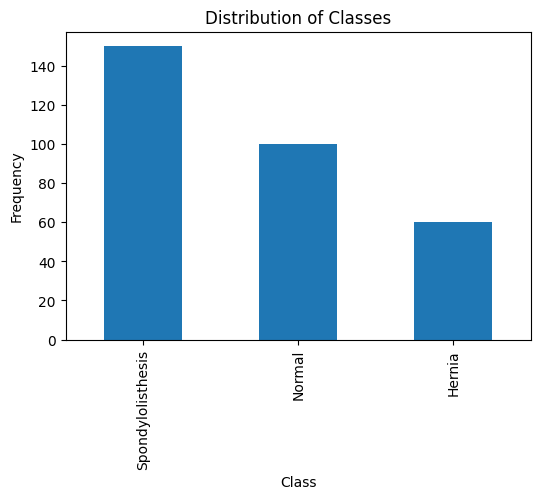

In [8]:
# prompt: Visualize the distribution of class

import matplotlib.pyplot as plt
# Assuming 'class' is the column name for the class variable
# Visualize the distribution of the class variable
plt.figure(figsize=(6, 4))
data['class'].value_counts().plot(kind='bar')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [9]:
# prompt: Perform scaling on all variables except class

# Assuming 'class' is the column name for the class variable
x = data.drop('class', axis=1)
y = data['class']

# Scale the features (all columns except the class)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [10]:
print(x_scaled)

[[ 0.14708636  0.50136873 -0.6651769  -0.18495031 -1.4476468  -0.70805942]
 [-1.24586434 -0.74876898 -1.45300075 -1.0415207  -0.26438488 -0.57955637]
 [ 0.4843695   0.46793218 -0.09926175  0.2730833  -0.89768556 -0.79542095]
 ...
 [ 0.05520137  0.51561812 -0.31097748 -0.31356364  0.58289256 -0.77348834]
 [-0.88582307 -0.88565951 -0.55861259 -0.47712775  0.04702109 -0.69554822]
 [-1.54892681 -1.24785954 -0.82539423 -1.05855695  0.45311695 -0.70658867]]


[0.54096355 0.1990971  0.12684842 0.07875466 0.05433627 0.        ]
[0.54096355 0.74006064 0.86690906 0.94566373 1.         1.        ]


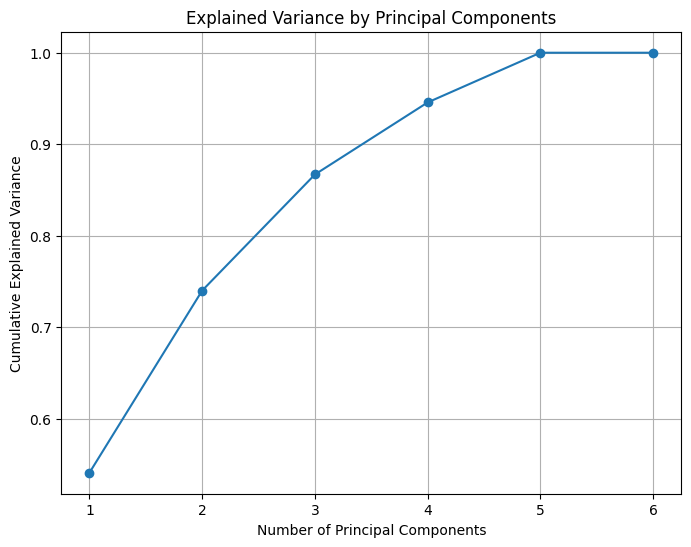

In [20]:
# prompt: Perform PCA using the scaled data using all variables

# Apply PCA with all variables
pca = PCA()
x_pca = pca.fit_transform(x_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

# Cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
print(cumulative_variance_ratio)


# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

**Observations:**  
PC1 captures 54% of the variation  
PC2 captures 19.9% of the variation
PC3 captures 12.7% of the variation
PC4 captures 7.9% of the variation

Therefore, Total Variations captured by PC1, PC2, PC3 and PC4 adds to 94.5%.

In [24]:
# prompt: Display amount of variance captured by PC1, PC2, PC3 and PC4 for each of the 6 variables

# Assuming 'x' is your scaled data and 'pca' is your fitted PCA object
# Access the components_ attribute to get the principal component vectors
components = pca.components_
components = components[0:4]

# Create a DataFrame to store the results
explained_variance_df = pd.DataFrame(components.T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=x.columns)

# Display the variance captured by each PC for each variable
print(explained_variance_df)



                               PC1       PC2       PC3       PC4
pelvic_incidence          0.535142 -0.002194  0.096069 -0.102799
pelvic_tilt               0.323585  0.527545  0.648701 -0.006441
lumbar_lordosis_angle     0.457970  0.092875 -0.152338 -0.548100
sacral_slope              0.445906 -0.396157 -0.360313 -0.127201
pelvic_radius            -0.143497  0.727756 -0.585991 -0.174213
degree_spondylolisthesis  0.423978  0.162777 -0.271184  0.801528


**Observations:**  
*  PC1 captures significant amount of variations in pelvic_incidence, lumbar_lordosis_angle, sacral_slope, degree_spondylolisthesis and even pelvic_tilt.

*  PC2 captures significant amount of variation in pelvic_tilt and pelvic_radius
*  PC3 captures significant amount of variation in pelvic_tilt
*  PC4 captures significant amount of variation in degree_spondylolisthesis

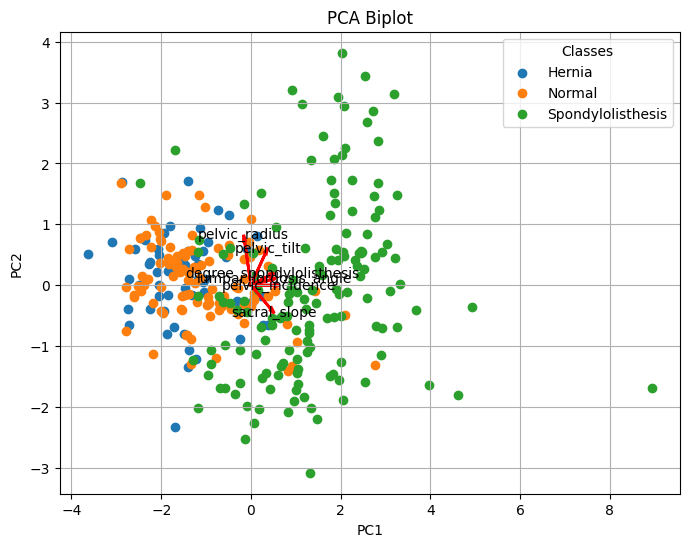

In [27]:
# prompt: Create a PCA Biplot with legend

# Create the biplot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the transformed data points
for label in np.unique(y):
    ax.scatter(x_pca[y == label, 0], x_pca[y == label, 1], label=label)

# Plot the principal component vectors
for i, feature in enumerate(x.columns):
    ax.arrow(0, 0, pca.components_[0, i], pca.components_[1, i],
             head_width=0.05, head_length=0.1, linewidth=2, color='red')
    ax.text(pca.components_[0, i] * 1.15, pca.components_[1, i] * 1.15, feature, color='black', ha='center', va='center')

# Add labels and legend
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("PCA Biplot")
ax.legend(title='Classes')
plt.grid(True)
plt.show()

Seems like on a 2D plot, there is a lot of overlap between Hernia and Normal.  However, Spondylolisthesis is quite well separated.

In [29]:
# prompt: Create a dataframe for PCA scores

# Create a DataFrame for PCA scores
pca_scores_df = pd.DataFrame(data=x_pca[:, :4], columns=['PC1', 'PC2', 'PC3', 'PC4'])
print(pca_scores_df.head())

        PC1       PC2       PC3       PC4
0 -0.238623 -0.893126  1.547663  0.054429
1 -2.246635 -0.401364  0.303298  0.643297
2  0.278507 -0.654382  1.008548 -0.514302
3  0.374460 -0.658015  1.344500  0.040140
4 -1.373478 -1.061649  0.262206  0.530596


Build a KNN Prediction Model using the PCA scores data

In [30]:
# prompt: Append class to pca_scores_df

# Append the original class labels to the pca_scores_df
pca_scores_df['class'] = y
print(pca_scores_df.head())

        PC1       PC2       PC3       PC4   class
0 -0.238623 -0.893126  1.547663  0.054429  Hernia
1 -2.246635 -0.401364  0.303298  0.643297  Hernia
2  0.278507 -0.654382  1.008548 -0.514302  Hernia
3  0.374460 -0.658015  1.344500  0.040140  Hernia
4 -1.373478 -1.061649  0.262206  0.530596  Hernia


In [31]:
# prompt: Label encode class column

from sklearn.preprocessing import LabelEncoder

# Assuming 'class' is your target variable column
le = LabelEncoder()
pca_scores_df['class'] = le.fit_transform(pca_scores_df['class'])
print(pca_scores_df.head())

        PC1       PC2       PC3       PC4  class
0 -0.238623 -0.893126  1.547663  0.054429      0
1 -2.246635 -0.401364  0.303298  0.643297      0
2  0.278507 -0.654382  1.008548 -0.514302      0
3  0.374460 -0.658015  1.344500  0.040140      0
4 -1.373478 -1.061649  0.262206  0.530596      0


In [32]:
# prompt: Split in to Train and Test data

# Split the data into training and testing sets
X = pca_scores_df.drop('class', axis=1)
y = pca_scores_df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size as needed

# Now you can use X_train, X_test, y_train, and y_test for model training and evaluation
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(248, 4) (62, 4) (248,) (62,)


In [37]:
# prompt: Build KNN Prediction model

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=11)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Confusion Matrix:
[[ 6  5  1]
 [ 3 14  1]
 [ 1  1 30]]
Accuracy: 0.8064516129032258


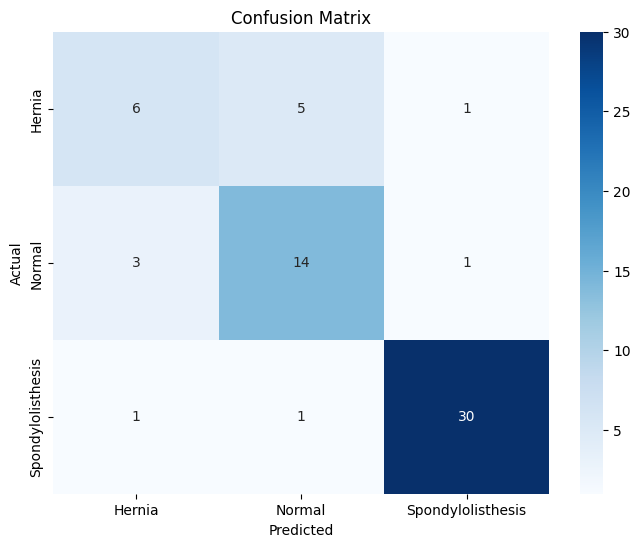

Accuracy: 0.8064516129032258


In [38]:
# prompt: Create Confusion Matrix for Actual versus Predicted class.  Print Accuracy below the plot

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming y_test and y_pred are already defined from your previous code

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

## **Conclusions:**  

Although we reduced the number of Features or Dimensions from 6 to 4 i.e., by 33%, the Accuracy of KNN Prediction Model fell from 0.82 to 0.80 i.e., by approximately by 2.4% only.

Therefore, using PCA we have been successful in achieving Dimensionality Reduction with minimal compromise in Accuracy.